Loading all necessary libraries

In [2]:
#!pip install wordcloud
!pip install tabulate

In [5]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
from sklearn.manifold import MDS
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from tabulate import tabulate
from nltk.stem import WordNetLemmatizer
#import VADER
#import Scikit-learn

SyntaxError: invalid syntax (3435026892.py, line 17)

Getting the word count and building a word cloud based on that

In [2]:
# Load your dataset
reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\yelp_reviews.csv")
reviews_df.head()

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Behzad\AppData\Local\Temp\ipykernel_28976\2741058518.py:2: SyntaxWarning: invalid escape sequence '\M'
  reviews_df = pd.read_csv("E:\MMA\Winter 2025\insy669 text\yelp_reviews.csv")


,Reviewer,Rating,Review
0,Kayla R.,5,Ordered online from here for my sister in laws...
1,Shawna R.,4,"I came in here around noon time, and it was bu..."
2,Gina C.,5,I stopped by the other day to use my BOGO coup...
3,Victoria J.,5,I absolutely love Nothing Bundt Cakes!! I requ...
4,Michelle A.,5,"This year for my birthday, I opted to go with ..."


In [6]:
#Convert the numerical ratings into binary labels (positive/negative).
reviews_df['sentiment'] = reviews_df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
reviews_df.head()

,Reviewer,Rating,Review,sentiment
0,Kayla R.,5,Ordered online from here for my sister in laws...,1
1,Shawna R.,4,"I came in here around noon time, and it was bu...",1
2,Gina C.,5,I stopped by the other day to use my BOGO coup...,1
3,Victoria J.,5,I absolutely love Nothing Bundt Cakes!! I requ...,1
4,Michelle A.,5,"This year for my birthday, I opted to go with ...",1


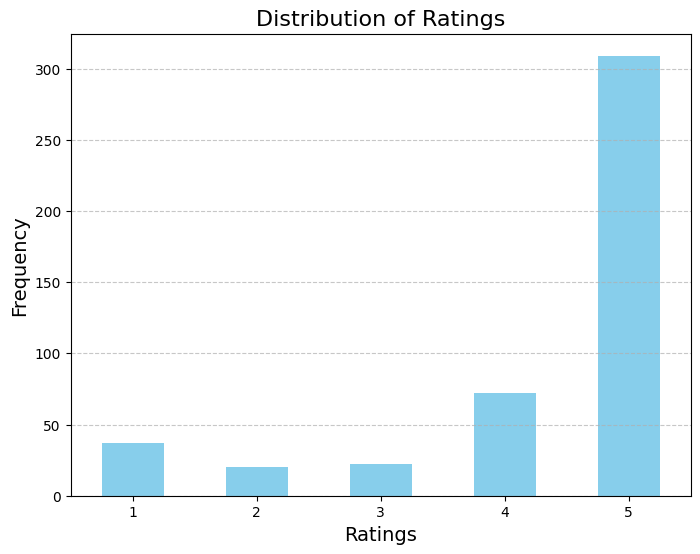

In [28]:
#check the imbalance of the data
import matplotlib.pyplot as plt

# Plot the distribution of 'Rating'
plt.figure(figsize=(8, 6))
reviews_df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the chart
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Ensure necessary resources are downloaded (if not already)
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean and tokenize text
def clean_and_tokenize(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

# Apply the function to each row in the DataFrame and create the 'clean_tokens' column
reviews_df['clean_tokens'] = reviews_df['Review'].apply(clean_and_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Behzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Split in train (80%) and test (20%) 
from sklearn.model_selection import train_test_split

# Perform the split
train_df, test_df = train_test_split(reviews_df, test_size=0.2, random_state=42)

# Display the size of each dataset
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 368
Testing set size: 92


In [13]:
#Split the data and the label
X_train = train_df['Review']
y_train = train_df['sentiment']
X_test = test_df['Review']
y_test = test_df['sentiment']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the maximum number of features (X) to limit the vocabulary size
max_features = 500  # Adjust this value as needed

# Initialize the TF-IDF vectorizer with binary weighting and feature limits
tfidf_vectorizer = TfidfVectorizer(
    max_features=max_features,  # Limit the number of features
    binary=True,                # Apply binary weighting
    stop_words='english',       # Remove common stopwords
    lowercase=True              # Convert text to lowercase
)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of the transformed datasets
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Testing data shape: {X_test_tfidf.shape}")

Training data shape: (368, 500)
Testing data shape: (92, 500)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for n_neighbors in range(5,15):

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the model using the TF-IDF transformed training data and labels
    knn.fit(X_train_tfidf, y_train)

    # Predict labels for the testing data
    y_pred = knn.predict(X_test_tfidf)

    # Compute the accuracy of the KNN model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy
    print(f"KNN Classifier Accuracy for k = {n_neighbors}: {accuracy * 100:.2f}%")


KNN Classifier Accuracy for k = 5: 89.13%
KNN Classifier Accuracy for k = 6: 90.22%
KNN Classifier Accuracy for k = 7: 89.13%
KNN Classifier Accuracy for k = 8: 90.22%
KNN Classifier Accuracy for k = 9: 88.04%
KNN Classifier Accuracy for k = 10: 92.39%
KNN Classifier Accuracy for k = 11: 89.13%
KNN Classifier Accuracy for k = 12: 91.30%
KNN Classifier Accuracy for k = 13: 90.22%
KNN Classifier Accuracy for k = 14: 91.30%


In [21]:
!pip install vaderSentiment

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# Initialize the VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment and classify
def classify_sentiment_vader(text, cutoff=0.05):
    # Calculate the sentiment scores
    sentiment_scores = analyzer.polarity_scores(text)
    # Use the compound score for classification
    compound_score = sentiment_scores['compound']
    # Assign label: 1 (positive) if score >= cutoff, 0 (negative) otherwise
    return 1 if compound_score >= cutoff else 0

# Apply VADER sentiment analysis to the training and testing data
y_train_pred = X_train.apply(lambda x: classify_sentiment_vader(x, cutoff=0.05))
y_test_pred = X_test.apply(lambda x: classify_sentiment_vader(x, cutoff=0.05))

# Compute accuracy for the testing data
accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy
print(f"VADER Sentiment Analysis Accuracy for cutoff 0.05: {accuracy * 100:.2f}%")


VADER Sentiment Analysis Accuracy for cutoff 0.05: 93.48%


KNN Classifier Accuracy for k = 10: 92.39%
VADER Sentiment Analysis Accuracy for cutoff 0.05: 93.48%

Calculating the lift matrix and building a better visualization to represent the matrix

In [10]:
reviews_df.head()

,Reviewer,Rating,Review,sentiment,clean_tokens
0,Kayla R.,5,Ordered online from here for my sister in laws...,1,"[ordered, online, sister, laws, engagement, pl..."
1,Shawna R.,4,"I came in here around noon time, and it was bu...",1,"[came, around, noon, time, busy, surprisingly,..."
2,Gina C.,5,I stopped by the other day to use my BOGO coup...,1,"[stopped, day, use, bogo, coupon, got, via, em..."
3,Victoria J.,5,I absolutely love Nothing Bundt Cakes!! I requ...,1,"[absolutely, love, nothing, bundt, cakes, requ..."
4,Michelle A.,5,"This year for my birthday, I opted to go with ...",1,"[year, birthday, opted, go, nothing, bundt, ca..."
